## The FATBANDS.nc file

The `FATBANDS.nc` file contains the projection of the KS wavefunctions onto atom-centered
functions with given angular momentum $l$. 
The file is generated by using the `prtdos` variable either in a SCF or NSCF run.
One can use the `abiopen` function provided by `abilab` to open the file and generate an instance of `FatbandsFile`.
Alternatively, use the `abiopen.py` script to open the file inside the shell with the syntax:

    abiopen.py out_FATBANDS.nc 
    
This command will start the ipython interpreter so that one can interact directly 
with the `FatbandFile` object (named `abifile` inside ipython).
To generate a jupyter notebook use:

    abiopen.py out_FATBANDS.nc -nb
    
For a quick visualization of the data, use:

    abiopen.py out_FATBANDS.nc -e

In [1]:
import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

# This line configures matplotlib to show figures embedded in the notebook.
# Replace `inline` with `notebook` in classic notebook
%matplotlib inline   

# Option available in jupyterlab. See https://github.com/matplotlib/jupyter-matplotlib
#%matplotlib widget 

In [2]:
# This fatbands file has been produced on a k-path so it is not suitable for DOS calculations.
fbnc_kpath = abilab.abiopen(abidata.ref_file("mgb2_kpath_FATBANDS.nc"))

To print file info i.e., dimensions, variables, etc.
(note that prtdos = 3, so LM decomposition is not available)

In [3]:
print(fbnc_kpath)

================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Thu Feb 27 03:35:00 2020
Modification Time: Wed Mar 20 16:53:35 2019
Change Time: Wed Mar 20 16:53:35 2019

================================= Structure =================================
Full Formula (Mg1 B2)
Reduced Formula: MgB2
abc   :   3.086000   3.086000   3.523000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  B     0.333333  0.666667  0.5
  2  B     0.666667  0.333333  0.5

Abinit Spacegroup: spgid: 191, num_spatial_symmetries: 24, has_timerev: True, symmorphic: False

============================== Electronic Bands ==============================
================================= Structure =================================
Full Formula (Mg1 B2)
Reduced Formula: MgB

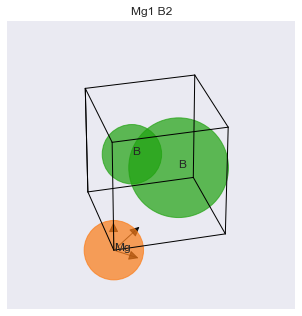

In [4]:
fbnc_kpath.structure.plot();

To plot the k-points belonging to the path:

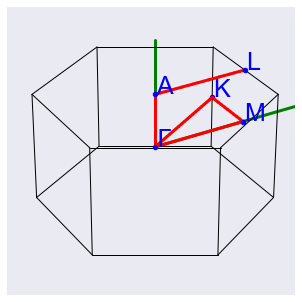

In [5]:
fbnc_kpath.ebands.kpoints.plot();

To plot the electronic fatbands grouped by atomic type:

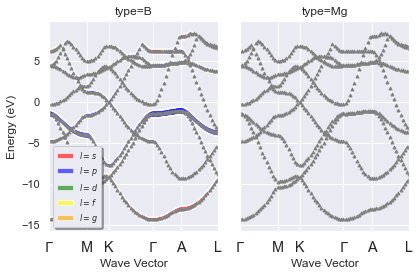

In [6]:
fbnc_kpath.plot_fatbands_typeview(tight_layout=True);

To plot the electronic fatbands grouped by $l$:

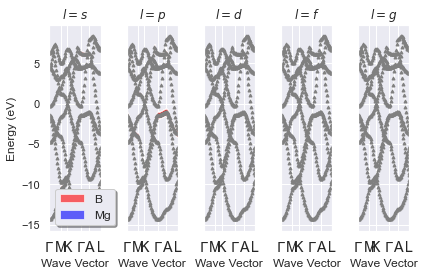

In [7]:
fbnc_kpath.plot_fatbands_lview(tight_layout=True);

Now we read another FATBANDS.nc file produced on 18x18x18 k-mesh

In [8]:
fbnc_kmesh = abilab.abiopen(abidata.ref_file("mgb2_kmesh181818_FATBANDS.nc"))
print(fbnc_kpath)

================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Thu Feb 27 03:35:00 2020
Modification Time: Wed Mar 20 16:53:35 2019
Change Time: Wed Mar 20 16:53:35 2019

================================= Structure =================================
Full Formula (Mg1 B2)
Reduced Formula: MgB2
abc   :   3.086000   3.086000   3.523000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  B     0.333333  0.666667  0.5
  2  B     0.666667  0.333333  0.5

Abinit Spacegroup: spgid: 191, num_spatial_symmetries: 24, has_timerev: True, symmorphic: False

============================== Electronic Bands ==============================
================================= Structure =================================
Full Formula (Mg1 B2)
Reduced Formula: MgB

and plot the $l$-PJDOS grouped by atomic type:

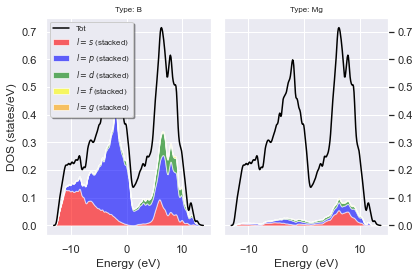

In [9]:
fbnc_kmesh.plot_pjdos_typeview(tight_layout=True);

Plot the L-PJDOS grouped by L:

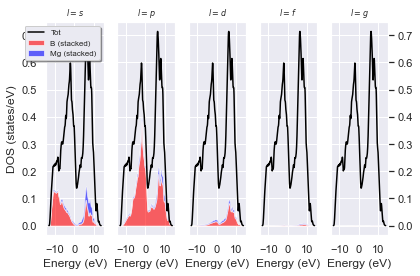

In [10]:
fbnc_kmesh.plot_pjdos_lview(tight_layout=True);

Now we use the two netcdf files to produce plots with fatbands + PJDOSEs.
The data for the DOS is taken from pjdosfile.

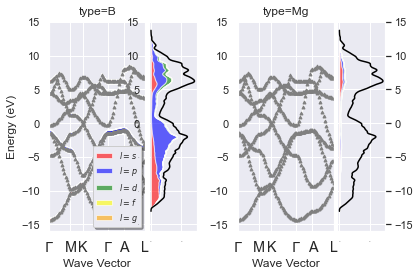

In [11]:
fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, view="type", tight_layout=True);

fatbands + PJDOS grouped by L:

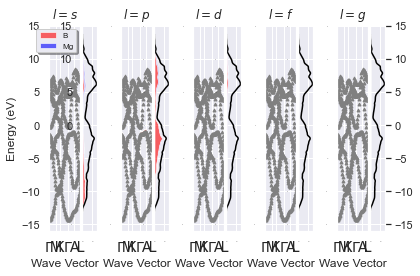

In [12]:
fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, view="lview", tight_layout=True);

<div class="alert alert-danger" role="alert">
Remember to close the files
</div>

In [13]:
fbnc_kpath.close()
fbnc_kmesh.close()